# Árvore de Decisão na Classificação de Medicamentos

<br>

### Classificação de Medicamentos

Durante um tratamento médico um grupo de pacientes com a mesma doença respondeu a um dos cinco medicamentos: a, b, c, d & e. A partir dessa situação, qual medicamento pode ser apropriado para um futuro paciente com a mesma doença? A construção de um modelo de Árvore de Decisão poderia prever a classe de um paciente desconhecido ou prescrever um medicamento para um novo paciente.

### Modelo de Árvore de Decisão

A Árvore de Decisão é um tipo de algoritmo de machine learning supervisionado que se baseia na ideia de divisão dos dados em grupos homogêneos, podendo ser aplicados para classificação ou regressão. Esse modelo é treinado conforme um conjunto de treino(exemplos previamente classificados) e posteriormente, outros exemplos são classificados de acordo com essa mesma árvore. A Árvore de Descisão possui então o objetivo de encontrar o atributo que gera a melhor divisão dos dados, subconjunto com maior pureza.

### Sobre os Dados
Os dados aqui utilizados foram obtidos através da plataforma Kaggle(www.kaggle.com). As variáveis presentes desse conjunto de dados são: idade, sexo, pressão arterial, colesterol, relação de sódio/potássio e medicamento prescrito ao qual cada paciente respondeu.

<br>

#### Importando Bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filtebwarnings("ignore")

<br>

#### Importando Arquivo csv e Criando DataFrame

In [2]:
pd.read_csv('medicamentos.csv')
df = pd.read_csv('medicamentos.csv')
df.head()

,Idade,Sexo,Pressao_Arterial,Colesterol,Sodio_Potassio,Medicamento
0,23,f,alto,alto,25.355,e
1,47,m,baixo,alto,13.093,c
2,47,m,baixo,alto,10.114,c
3,28,f,normal,alto,7.798,d
4,61,f,baixo,alto,18.043,e


<br>

#### Explorando os Dados
Entendendo o conjunto de dados a ser trabalhado através de uma visão exploratória.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idade             200 non-null    int64  
 1   Sexo              200 non-null    object 
 2   Pressao_Arterial  200 non-null    object 
 3   Colesterol        200 non-null    object 
 4   Sodio_Potassio    200 non-null    float64
 5   Medicamento       200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


+ O arquivo possui 200 linhas e 6 colunas
+ A coluna "Idade" possui números do tipo inteiros(int64)
+ Os dados da coluna "Sodio_Potassio" são do tipo pontos flutuantes(float64)
+ As demais colunas possuem dados do tipo categórico(object)
+ Não há dados nulos
+ O tamanho do arquivo é de 9.5KB

Variável Idade

In [4]:
print("Idade Máxima:", df.Sodio_Potassio.max())
print("Idade Mínima:", df.Sodio_Potassio.min())

Idade Máxima: 38.247
Idade Mínima: 6.269


Variável Sexo

In [5]:
df.Sexo.value_counts()

m    104
f     96
Name: Sexo, dtype: int64

Variável Pressão Arterial

In [6]:
df.Pressao_Arterial.value_counts()

alto      77
baixo     64
normal    59
Name: Pressao_Arterial, dtype: int64

Variável Colesterol

In [7]:
df.Colesterol.value_counts()

alto      103
normal     97
Name: Colesterol, dtype: int64

Variável Relação Sódio/Potássio

In [8]:
print("Relação Sodio/Potassio Máxima:", df.Sodio_Potassio.max())
print("Relação Sodio/Potassio Mínima:", df.Sodio_Potassio.min())

Relação Sodio/Potassio Máxima: 38.247
Relação Sodio/Potassio Mínima: 6.269


Variável Medicamento

In [9]:
df.Medicamento.value_counts()

e    91
d    54
a    23
c    16
b    16
Name: Medicamento, dtype: int64

<br>

#### Preparando os Dados 
+ x como variável independente(atributos)
+ y como variável alvo(saída estimada)
+ Converter dados categóricos para numéricos

<br>

Definindo a variável independente "x".

In [10]:
x = df[['Idade', 'Sexo', 'Pressao_Arterial', 'Colesterol', 'Sodio_Potassio']].values
x[0:5] 

array([[23, 'f', 'alto', 'alto', 25.355],
       [47, 'm', 'baixo', 'alto', 13.093],
       [47, 'm', 'baixo', 'alto', 10.113999999999999],
       [28, 'f', 'normal', 'alto', 7.797999999999999],
       [61, 'f', 'baixo', 'alto', 18.043]], dtype=object)

Convertendo os dados categóricos em numéricos usando a função ".LabelEncoder".

In [11]:
le_sexo = preprocessing.LabelEncoder()
le_sexo.fit(['f','m'])
x[:,1] = le_sexo.transform(x[:,1])

le_pa = preprocessing.LabelEncoder()
le_pa.fit(['alto','baixo','normal'])
x[:,2] = le_pa.transform(x[:,2])

le_colesterol = preprocessing.LabelEncoder()
le_colesterol.fit(['alto','normal'])
x[:,3] = le_colesterol.transform(x[:,3])

x[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Definindo a variável alvo "y".

In [12]:
y = df['Medicamento']
y[0:5]

0    e
1    c
2    c
3    d
4    e
Name: Medicamento, dtype: object

<br>

#### Configurando a Árvore de Decisão 

Importando a função "train_test_split".

In [13]:
from sklearn.model_selection import train_test_split

Dividindo os dados em treino(70%) e teste(30%).

In [14]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=3)

Conferindo as dimensões de treino.

In [15]:
print("x_treino Linhas e Colunas:" + str(x_treino.shape))
print("y_traino Linhas:" + str(y_treino.shape))

x_treino Linhas e Colunas:(140, 5)
y_traino Linhas:(140,)


Conferindo as dimensões de teste.

In [16]:
print("x_teste Linhas e Colunas:" + str(x_teste.shape))
print("y_teste Linhas:" + str(y_teste.shape))

x_teste Linhas e Colunas:(60, 5)
y_teste Linhas:(60,)


<br>

#### Modelagem
+ Criando uma feição para o modelo como "arvore"
+ Especificando o ganho de cada nó: "criterion='entropy'"
+ Profunbdidade máxima da árvore: "max_depth=4"

In [17]:
arvore = DecisionTreeClassifier(criterion="entropy", max_depth=4)
arvore

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Ajustando os dados de treinamento "x_treino" e "y_treino"

In [18]:
arvore.fit(x_treino,y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<br>

#### Previsão
Realizando previsões no conjunto de dados de teste e salvando em uma variável nomeada como "pred_arvore".

In [19]:
pred_arvore = arvore.predict(x_teste)

Comparando visualmente as previsões com os valores reais.

In [20]:
print(pred_arvore [0:5])
print(y_teste [0:5])

['e' 'd' 'd' 'd' 'd']
40     e
51     d
139    d
197    d
170    d
Name: Medicamento, dtype: object


<br>

#### Métrica de Avaliação
A métrica de avaliação usada aqui será a de Entropia, que é uma maneira de mensurar a pureza de cada subconjunto de uma árvore de decisão. Essa métrica pode ir de 0 a 1, caso seja zero, não há supresa nas respostas possíveis.

Conhecendo a acurácia do modelo com a função "metrics" importada do sklearn.

In [21]:
from sklearn import metrics
print("Acurácia:", metrics.accuracy_score(y_teste, pred_arvore))

Acurácia: 0.9833333333333333


Na classificação multilabel a função retorna a precisão do subconjunto. O modelo dessa Árvore de Decisão apresenta 98% de eficácia em sua métrica.

<br>

#### Visualizando a Árvore de Decisão

*As bibliotecas "pydotplus" e "graphviz" devem ter sido instaladas previamente.

Importando Bibliotecas de Visualização

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from  io import StringIO
from sklearn import tree
import pydotplus
%matplotlib inline 

Configurando a visualização da Árvore de Decisão

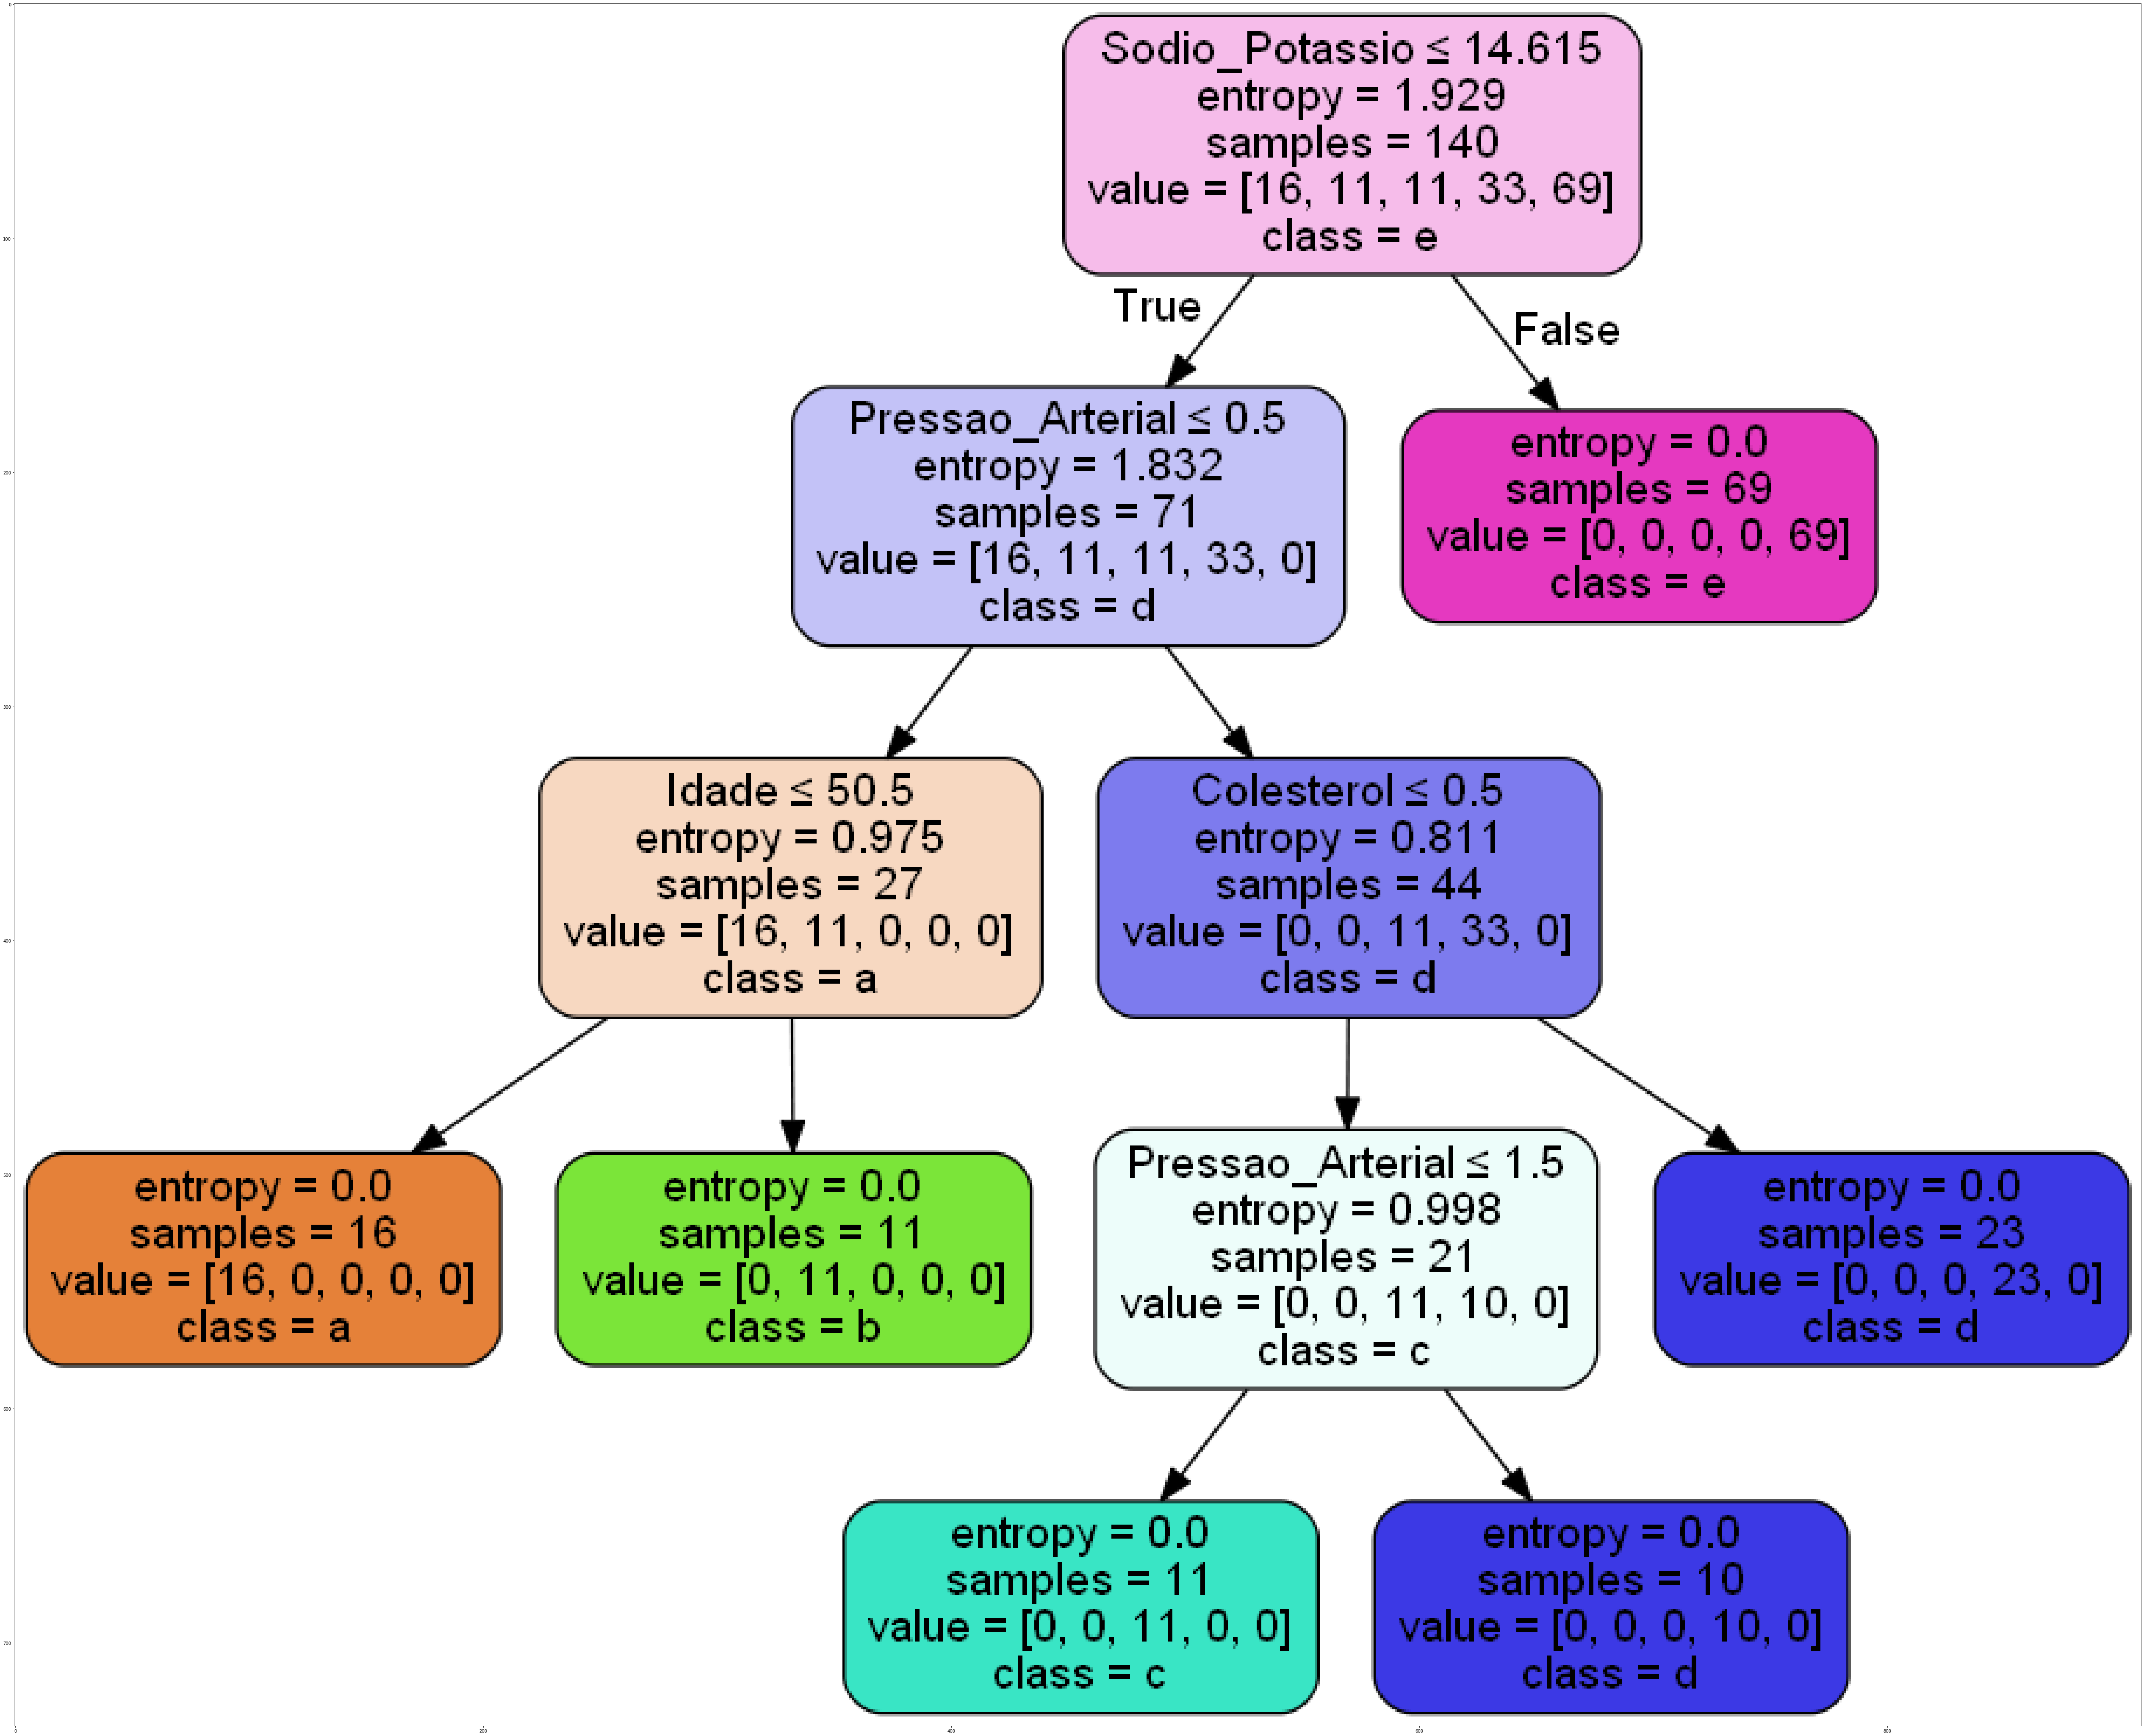

In [23]:
dot_data = StringIO()
filename = "Arvore_Medicamentos.png"
featureNames = df.columns[0:5]
out = tree.export_graphviz(arvore, feature_names = featureNames,
                           out_file = dot_data, class_names = np.unique(y_treino),
                           filled = True, rounded=True, special_characters = True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (90, 175))
plt.imshow(img,interpolation = 'nearest')

<br>

### Conclusões

+ O algoritimo de Árvore de Decisão gerado aprensentou 98% de acurácia, significando alta eficácia em sua perfomance.


+ O modelo mostra-se apto para prever a classe de um paciente desconhecido e prescrever um medicamento para um novo paciente.


+ Conhecer os resultados desse modelo torna o tratamento médico dos pacientes muito mais pratico, diminuindo a chance erros nos diagnosticos e possiveis reações negativas resultantes de prescrições de medicamentos inadequados ao perfil do paciente.


<br>